# Comparing Compression Techniques

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

The variable tumor_large_ contains the original image. The variable tumor_reduced contains the image that was compressed with block processing.

Large shape: (965, 1158)
Reduced shape: (65, 78)


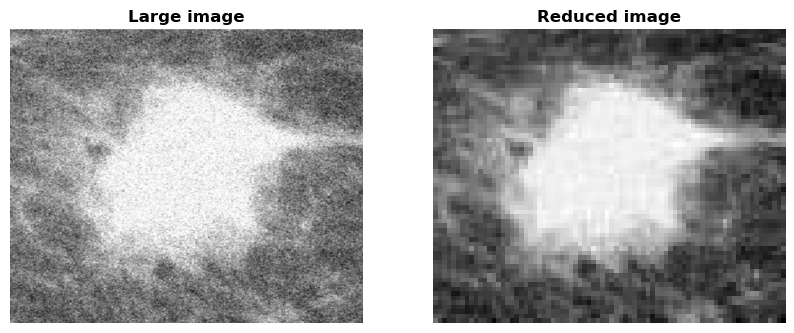

In [2]:
tumor_large = cv2.imread("./images/tumorLargeFile.jpg", cv2.IMREAD_GRAYSCALE)
tumor_reduced = cv2.imread("./images/tumorReducedFile.jpg", cv2.IMREAD_GRAYSCALE)
print("Large shape:", tumor_large.shape)
print("Reduced shape:", tumor_reduced.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor_large, cmap='gray')
axs[0].set_title('Large image')
axs[0].axis("off")
axs[1].imshow(tumor_reduced, cmap='gray') 
axs[1].set_title('Reduced image')
axs[1].axis("off")
plt.show()

Resize reduced image to large size

Reduced shape: (65, 78)
Restored shape: (965, 1158)


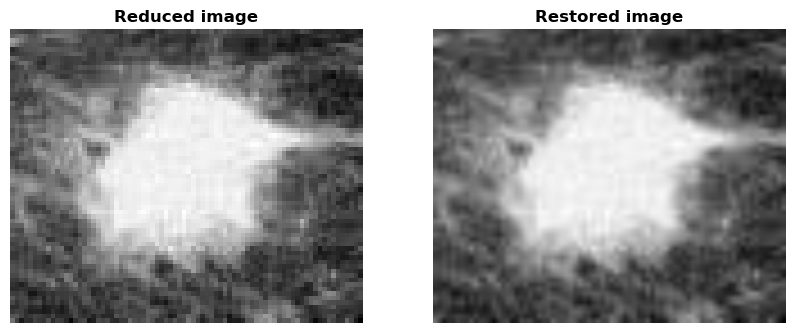

In [3]:
tumor_restored = cv2.resize(tumor_reduced, [tumor_large.shape[1], tumor_large.shape[0]])
print("Reduced shape:", tumor_reduced.shape)
print("Restored shape:", tumor_restored.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor_reduced, cmap='gray')
axs[0].set_title('Reduced image')
axs[0].axis("off")
axs[1].imshow(tumor_restored, cmap='gray') 
axs[1].set_title('Restored image')
axs[1].axis("off")
plt.show()

Compress and restore image with cv2.resize function

Large shape: (965, 1158)
Compressed-Restored shape: (965, 1158)


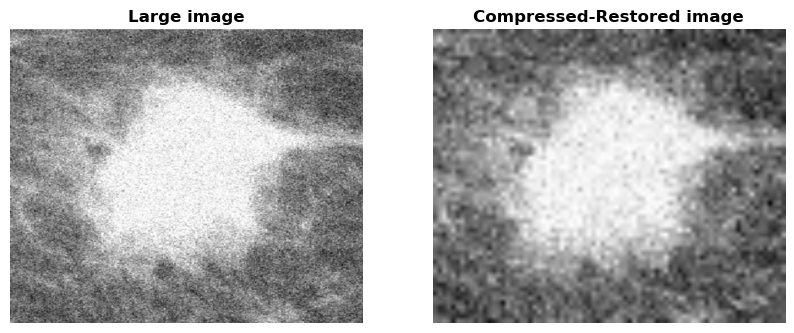

In [4]:
tumor_compressed_restored = cv2.resize(tumor_large, [tumor_reduced.shape[1], tumor_reduced.shape[0]])
tumor_compressed_restored = cv2.resize(tumor_compressed_restored, [tumor_large.shape[1], tumor_large.shape[0]])
print("Large shape:", tumor_large.shape)
print("Compressed-Restored shape:", tumor_compressed_restored.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tumor_large, cmap='gray')
axs[0].set_title('Large image')
axs[0].axis("off")
axs[1].imshow(tumor_compressed_restored, cmap='gray') 
axs[1].set_title('Compressed-Restored image')
axs[1].axis("off")
plt.show()

The peak signal-to-noise ratio of an image with respect to a reference can be used to compare compression techniques. The higher the value, the better the quality.

In [5]:
psnr_restored = cv2.PSNR(tumor_restored, tumor_large)
psnr_compressed_restored = cv2.PSNR(tumor_compressed_restored, tumor_large)

print(f"PSNR from restored image: {psnr_restored:.2f}")
print(f"PSNR from compressed-restored image: {psnr_compressed_restored:.2f}")

PSNR from restored image: 21.68
PSNR from compressed-restored image: 21.13


PSNR looks only at intensity difference. There are other full-reference metrics that attempt to determine if qualities of the image are preserved. For instance, the structural similarity (SSIM) index can better reflect how well structures (e.g. edges and corners) are preserved. The SSIM index is between 0 and 1, with higher numbers representing better quality.

In [6]:
ssim_restored = ssim(tumor_restored, tumor_large)
ssim_compressed_restored = ssim(tumor_compressed_restored, tumor_large)

print(f"SSIM from restored image: {ssim_restored:.2f}")
print(f"SSIM from compressed-restored image: {ssim_compressed_restored:.2f}")

SSIM from restored image: 0.26
SSIM from compressed-restored image: 0.28
